<center>
<img src="https://wpsovet.ru/wp-content/uploads/1/6/4/1642a836ada1355f35ef577d9024a728.jpg" width="700"> 

# Андан на экономе: домашнее задание 2
</center>

**ФИО:** Ягжов Иван Алексеевич

**id из контеста:** dap_econ_2022_120

**Внимание, конкурс!** 

Напиши свой любимый анекдот. Аcсисты и семенаристы устроют голосование. Лучшая тройка получит по бонусному баллу.

**Место для аника:** 
Маляр красит стенку в сумашедшем доме. Подходит псих: 
"Ты крепко за кисточку держишься?"
"Да" — отвечает тот
"Тогда я лестницу забираю".

## Общая информация


__Дата выдачи:__ 06.03.2023

__Мягкий дедлайн:__ 23:59MSK 02.04.2022

__Жесткий дедлайн:__ 23:59MSK 09.04.2022

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-NUM-USERNAME.ipynb, где NUM — номер из вашего логина, а USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

Если хотите, можете разбить тетрадку на несколько разных для своего удобства.

In [703]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 7)

# Часть 1: рисковая 

В этом задании мы немного поработаем с ценами на акции. За задание можно получить $50$ баллов.

В табличке `prices.tsv` лежат данные о том, как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по ценным бумагам. Подгрузим эти таблицы и посмотрим на них. 

In [704]:
df_prices = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/data/price.tsv', sep = '\t')
df_prices = df_prices.drop('GEHC', axis=1) # сликом молодая компания
print(df_prices.shape)
df_prices.head()

(2518, 521)


,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
0,2013-03-05 00:00:00,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
1,2013-03-06 00:00:00,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2,2013-03-07 00:00:00,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
3,2013-03-08 00:00:00,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
4,2013-03-11 00:00:00,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889


In [706]:
df_inf = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/data/information.tsv', sep='\t')
print(df_inf.shape)
df_inf.head()

(525, 12)


,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False


## 1.1 Разогреваемся

__а) [0 баллов]__ В колонке `Date` лежит день, когда торговалась бумага. Сейчас у неё тип `string`. Превратите её в `datetime` и сделайте индексом таблицы.

In [707]:
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.set_index('Date', inplace = True)
df_prices

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-05,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,63.810726,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
2013-03-06,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,64.217216,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2013-03-07,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,64.349945,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
2013-03-08,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,64.997017,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
2013-03-11,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,64.955536,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,142.179993,15.630000,140.630005,147.919998,154.279999,156.630005,123.529999,99.769997,69.209999,266.250000,...,110.550003,34.549999,102.550003,126.570000,123.300003,296.230011,50.389999,73.720001,131.839996,165.470001
2023-02-28,141.970001,15.980000,144.960007,147.410004,153.899994,155.559998,123.279999,101.720001,70.000000,265.549988,...,109.910004,38.070000,102.650002,127.160004,123.870003,300.250000,50.619999,74.589996,131.149994,167.000000
2023-03-01,137.509995,16.030001,138.820007,145.309998,155.270004,156.509995,120.830002,100.830002,70.970001,263.589996,...,110.889999,37.360001,101.089996,126.199997,122.080002,302.339996,50.439999,69.620003,128.440002,167.570007


__б) [5 баллов]__ В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? 

In [708]:
print('Количество ценных бумаг из таблицы, входящие в индекс NASDAQ:', len(df_inf[df_inf.NASDAQ == True]))

Количество ценных бумаг из таблицы, входящие в индекс NASDAQ: 103


Сколько ценных бумаг входят во все три индекса сразу?

In [709]:
print('Количество ценных бумаг, входящих во все три индекса сразу:', 
      np.sum(df_inf['S&P-500'] & df_inf['DJI'] & df_inf['NASDAQ']))

Количество ценных бумаг, входящих во все три индекса сразу: 5


В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

Считаем, что 19 век это: с 1801 по 1900 год по григорианскому календарю

In [710]:
df_SP500 = df_inf[df_inf['S&P-500'] == True]  
df_SP500_1 = df_SP500[df_SP500['Founded'] < 1900]
print('Количество компаний из индекса S&P-500, основанные в 19 веке:', len(df_SP500_1[df_SP500_1['Founded'] >= 1801]))

Количество компаний из индекса S&P-500, основанные в 19 веке: 95


В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных?

In [10]:
print('Количество уникальных секторов:', len(df_inf.groupby('GICS Sector')))

Количество уникальных секторов: 11


Таблица с информацией устаревшая. Есть тикеры, которые попали в таблицу с ценами, но не попали в таблицу с информацией. Сколько таких тикеров? 

In [711]:
df_inf.set_index('Symbol', inplace = True)
inf = set(df_inf.index.values)
prices = set(df_prices.columns.values)
print('Количество тикеров, которые попали в таблицу с ценами, но не попали в таблицу с информацией:', len(prices-inf))

Количество тикеров, которые попали в таблицу с ценами, но не попали в таблицу с информацией: 58


__в) [5 баллов]__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора?

In [712]:
largest_sectors = sorted(df_SP500.groupby('GICS Sector')['S&P-500'].count(), reverse = True) 
# тут нашёл количество компаний из индекса в каждом секторе 
print('Количество компаний S&P-500 в 3 самых крупных секторах:', np.sum(largest_sectors[:3]))

Количество компаний S&P-500 в 3 самых крупных секторах: 210


__г) [5 баллов]__ Теперь поработаем со стоимостью акций. 

Выберите 5 случайных тикеров и постройте для них картинки с динамикой цен и гистограммы. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы? 

__Ответ:__

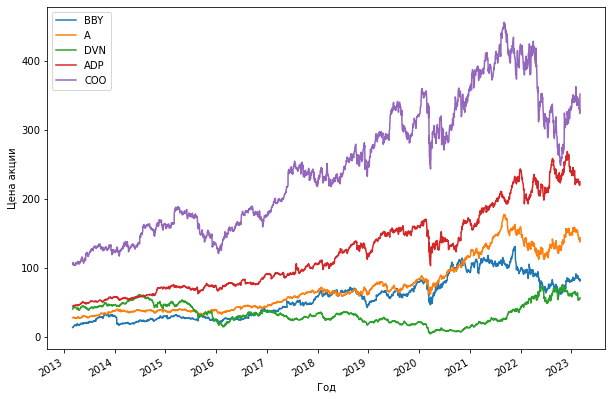

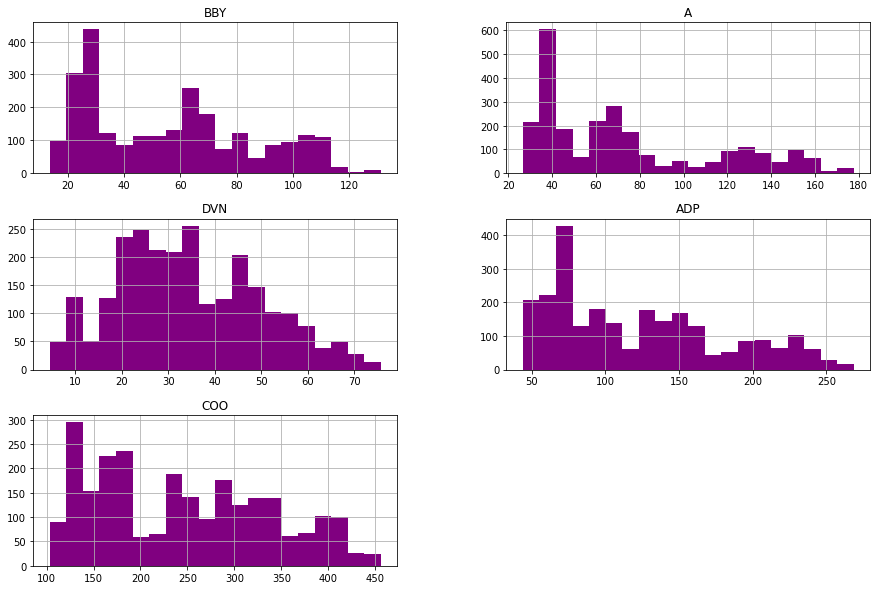

In [713]:
np.random.seed(322)
df_five = df_prices.sample(n = 5, axis = 1)

df_five.plot()
plt.xlabel('Год')
plt.ylabel('Цена акции')
df_five.hist(color = 'purple', bins = 20, figsize = (15, 10));

Нет, распределение стоимостей акций не похоже на нормальное. В течение последних 10 лет у всех компаний наблюдается тенденция роста со спадами и подъемами, конечно же. Да, кризисы видны, самый ярко выраженный - 2020 год, когда был обвал всех компаний.

__д) [5 баллов]__ Найдите медианную цену акций за прошедший год (НЕ 10 лет) для каждого тикера. Сделайте `left join` таблицы с медианными ценами и таблицы с секторами экономики. Найдите для каждого сектора $95\%$ квантиль медианной цены.

Сделаем таблицу: тикер - сектор

In [714]:
df_symbol_sector = pd.DataFrame(df_inf['GICS Sector'])
df_symbol_sector

,GICS Sector
Symbol,
A,Health Care
AAL,Industrials
AAP,Consumer Discretionary
AAPL,Information Technology
ABBV,Health Care
...,...
ZBH,Health Care
ZBRA,Information Technology
ZION,Financials


In [715]:
df_median_2022 = df_prices[df_prices.index  >= '2022-01-01']
df_median_2022 = df_median_2022[df_median_2022.index  < '2023-01-01']
df_median_2022 = pd.DataFrame({'Symbol': df_prices.columns, 'Median prices': df_median_2022.median()})
df_median_2022.set_index('Symbol', inplace = True)
df_median_2022

,Median prices
Symbol,
A,132.094055
AAL,14.500000
AAP,185.792175
AAPL,153.387222
ABBV,144.825607
...,...
ZBRA,325.369995
ZION,54.170490
ZM,103.180000


Объединяем

In [716]:
df_join = df_median_2022.join(df_symbol_sector)
df_join

,Median prices,GICS Sector
Symbol,,
A,132.094055,Health Care
AAL,14.500000,Industrials
AAP,185.792175,Consumer Discretionary
AAPL,153.387222,Information Technology
ABBV,144.825607,Health Care
...,...,...
ZBRA,325.369995,Information Technology
ZION,54.170490,Financials
ZM,103.180000,NaN


Считаем квантили

In [717]:
df_1g = pd.DataFrame(df_join.groupby('GICS Sector')['Median prices'].quantile(0.95))
df_1g.rename(columns = {'Median prices':' 95% квантиль медианной цены'}, inplace = True)
df_1g

,95% квантиль медианной цены
GICS Sector,
Communication Services,260.027003
Consumer Discretionary,1760.140015
Consumer Staples,246.914078
Energy,159.902217
Financials,354.431122
Health Care,523.427579
Industrials,427.725174
Information Technology,419.005197
Materials,284.315181


## 1.2 Риск и доходность

__е) [5 баллов]__ Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [718]:
df_risk = df_prices.diff() / df_prices.shift(1)
df_risk = df_risk.iloc [1: , :]
df_risk

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-06,0.013596,0.037010,-0.010006,-0.012710,0.006132,0.004350,NaN,-0.011537,0.001207,0.006370,...,-0.000558,0.006665,0.031283,0.009201,-0.007121,-0.001783,0.023673,NaN,NaN,-0.012832
2013-03-07,0.000231,0.017159,0.000525,0.011559,-0.006624,-0.008251,NaN,0.004669,0.013869,0.002067,...,-0.009491,0.005912,-0.032038,0.005081,-0.005313,-0.003796,0.007177,NaN,NaN,0.020975
2013-03-08,-0.005087,0.006748,0.008135,0.002648,-0.004001,0.008319,NaN,0.007262,0.003965,0.010056,...,0.002931,0.004701,0.001057,0.006989,0.006810,0.009413,0.001584,NaN,NaN,-0.013599
2013-03-11,-0.005112,0.014075,0.008980,0.014245,0.008838,0.001444,NaN,0.007208,0.003555,-0.000638,...,0.002136,0.002807,0.011607,0.001772,0.004510,0.009547,0.013043,NaN,NaN,0.002640
2013-03-12,-0.004439,0.024455,-0.002193,-0.021559,-0.013273,0.002060,NaN,0.001432,-0.000197,-0.003576,...,0.000000,-0.002567,-0.007998,0.013119,0.006073,0.001100,-0.006243,NaN,NaN,-0.010533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,0.006940,0.004499,0.012820,0.008248,0.010281,-0.012234,0.006108,-0.006868,0.000578,-0.001051,...,-0.001806,0.006408,0.001465,-0.002050,0.004890,0.014764,0.002387,-0.002841,0.007335,-0.005170
2023-02-28,-0.001477,0.022393,0.030790,-0.003448,-0.002463,-0.006831,-0.002024,0.019545,0.011415,-0.002629,...,-0.005789,0.101881,0.000975,0.004661,0.004623,0.013570,0.004564,0.011801,-0.005234,0.009246
2023-03-01,-0.031415,0.003129,-0.042357,-0.014246,0.008902,0.006107,-0.019873,-0.008750,0.013857,-0.007381,...,0.008916,-0.018650,-0.015197,-0.007550,-0.014451,0.006961,-0.003556,-0.066631,-0.020663,0.003413


Постройте для 5 случайно выбранных тикеров картинку с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение? 
- Видно ли по ящику с усами, что в данных довольно много выбросов? 

__Ответ:__ Гистограммы доходностей напоминают нормально распределение. Анализируя ящики с усами, видно, что действительно много выбросов. Даже есть экстремальные, превышающие длину ящика в несколько раз.

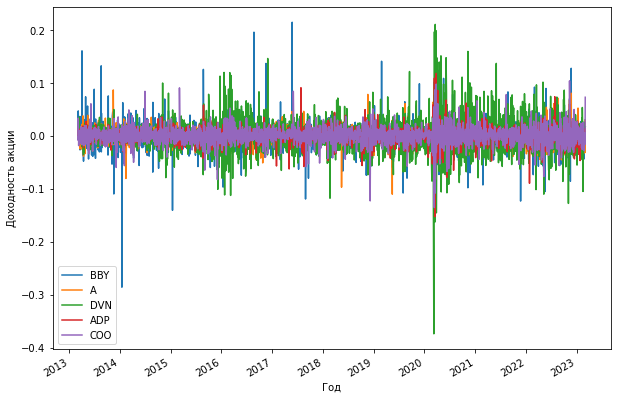

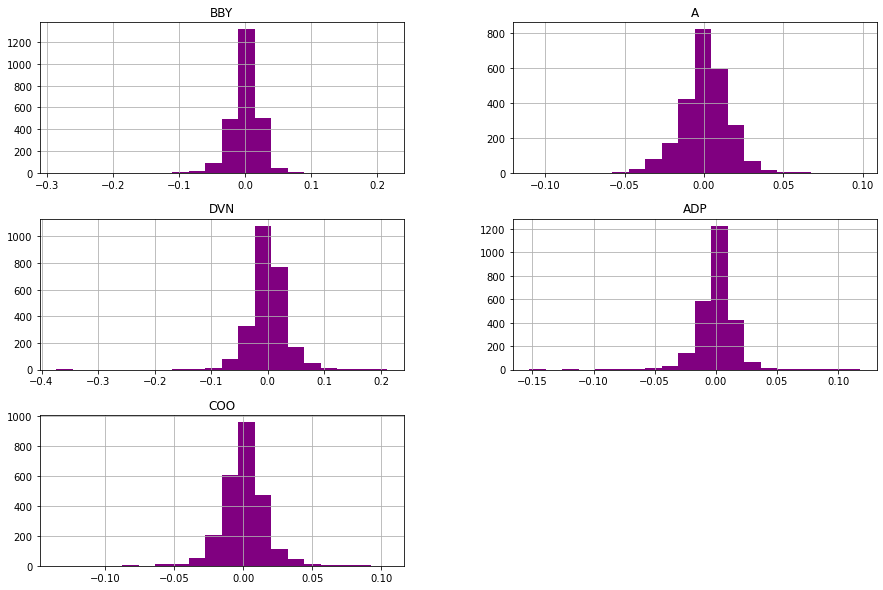

In [19]:
np.random.seed(322)
df_five_risk = df_risk.sample(n = 5, axis = 1)
df_five_risk.plot()
plt.xlabel('Год')
plt.ylabel('Доходность акции')
df_five_risk.hist(color = 'purple', bins = 20, figsize = (15, 10));

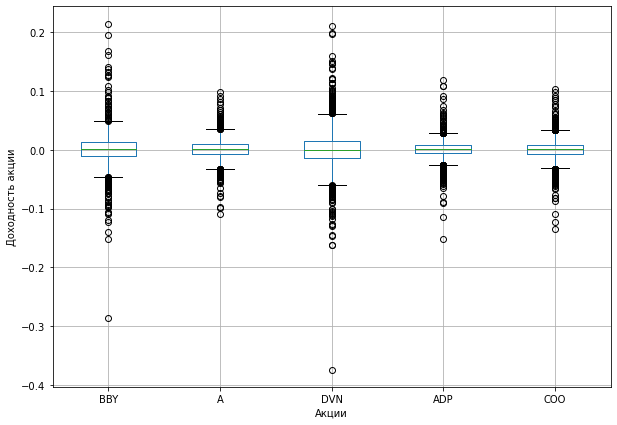

In [20]:
df_five_risk.boxplot()
plt.xlabel('Акции')
plt.ylabel('Доходность акции');

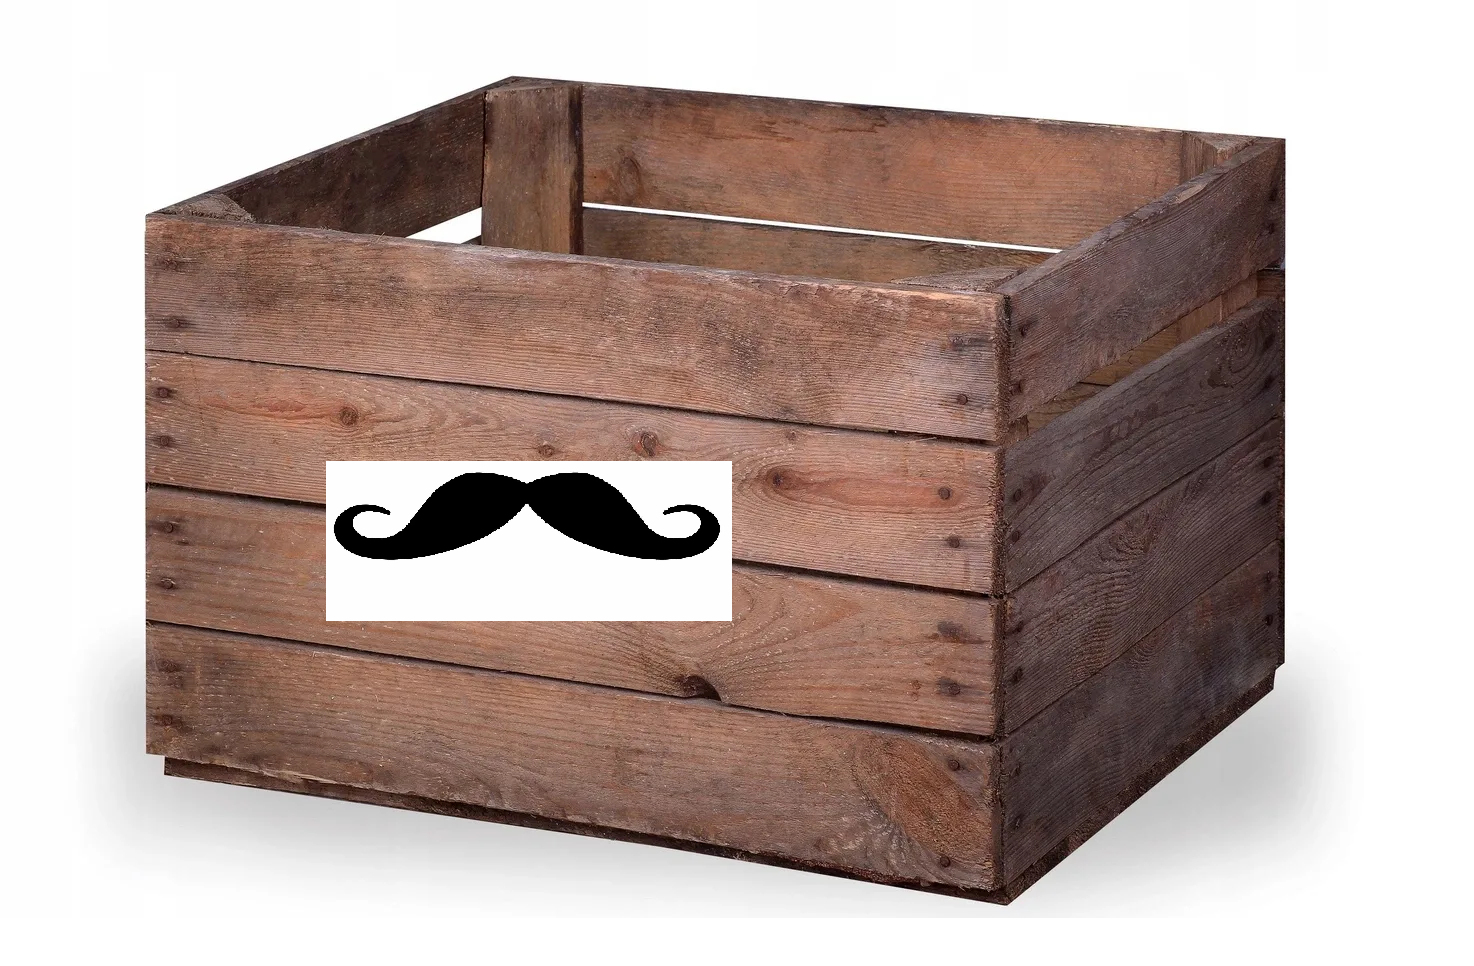

Чтобы посмотреть, насколько сильно распределение отличается от нормального, можно вспользоваться диаграммой квантиль-квантиль. На картинке ниже видно, что центр распределения похож на нормальное, а квантили на хвостах отличаются от нормальных в более тяжёлую сторону. 

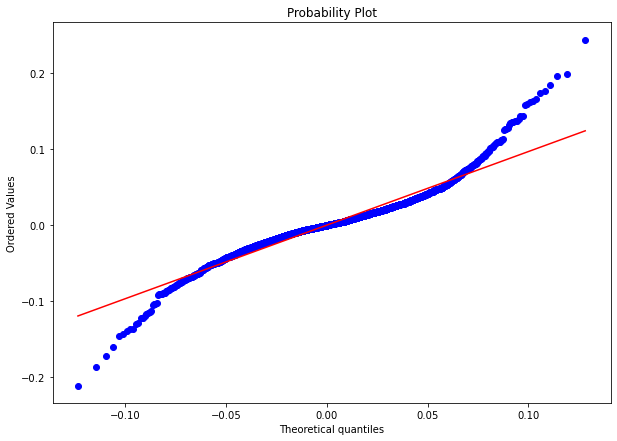

In [21]:
ax = plt.subplot(111)
x = df_risk['TSLA'].values
sts.probplot(x, dist="norm", sparams=(x.mean(), x.std()), plot=ax);

__ё) [10 баллов]__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Разобьём выборку на обучающую и тестовую. Первые 4 года войдут в обучающую выборку, последний год в тестовую. Мы будем оценивать рискованность и доходность разных активов на обучающей выборке, а затем смотреть, насколько хорошо мы это сделали на тестовой.

In [719]:
df_train = df_risk[df_risk.index  < '2022-03-03']
df_test = df_risk[df_risk.index  >= '2022-03-03']

__Все расчёты ниже делайте по обучающей выборке.__ 

Посчитайте для всех компаний на обучающей выборке среднюю доходность (просто сделайте `.mean()` за весь период). Найдите 10 самых доходных компаний и 10 самых убыточных.  Есть ли среди самых доходных компаний Тесла? :) 

In [720]:
R = pd.DataFrame({'r': df_train.mean()})
R

,r
A,0.000808
AAL,0.000579
AAP,0.000659
AAPL,0.001268
ABBV,0.000925
...,...
ZBRA,0.001256
ZION,0.000733
ZM,0.001823
ZS,0.002762


In [721]:
print("10 самых убыточных компаний:", *R.sort_values(by = 'r').iloc[0:10 , :].index)

10 самых убыточных компаний: RIVN VTRS KHC GE IBM LUMN KMI SLB BEN WBD


In [722]:
print("10 самых доходных компаний:", *R.sort_values(by = 'r').iloc[-10: , :].index)

10 самых доходных компаний: CRWD TSLA ZS ENPH CARR DDOG GFS MRNA LCID CEG


Да, Тесла входит в десятку самых доходных компаний

Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых.  Есть ли среди самых рискованных компаний Тесла? :) 

In [723]:
STD = pd.DataFrame({'std': df_train.std()})
STD

,std
A,0.015556
AAL,0.031476
AAP,0.020050
AAPL,0.017579
ABBV,0.017331
...,...
ZBRA,0.023282
ZION,0.020683
ZM,0.042788
ZS,0.037999


In [724]:
print("10 Менее рискованных компаний:", *STD.sort_values(by = 'std').iloc [0:10 , :].index)

10 Менее рискованных компаний: VZ JNJ KO PG RSG WM PEP CL MMC COST


In [725]:
print('10 наиболее рискованных компаний:', *STD.sort_values(by = 'std').iloc [-10: , :].index)

10 наиболее рискованных компаний: DDOG CRWD SEDG GFS ZM PDD MRNA ENPH LCID RIVN


Тесла не входит ни в самые рискованные, ни в самые безопасные компании

Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Создайте таблицу `df_result`. Запищите туда три колонки: тикер, доходность и стандартное отклонение.

In [726]:
df_result = STD.join(R)
df_result.head()

,std,r
A,0.015556,0.000808
AAL,0.031476,0.000579
AAP,0.020050,0.000659
AAPL,0.017579,0.001268
ABBV,0.017331,0.000925


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага.

Отдельно отметьте на картинке точку, соотвествующую Тесле так, чтобы её было видно. Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

__Ответ:__ да, можно. Чуть выше и чуть левее на графике располагается компания с примерно такой же доходностью ~0,003, но стандартное отклонение меньше 0,03, что менее рискованнее.

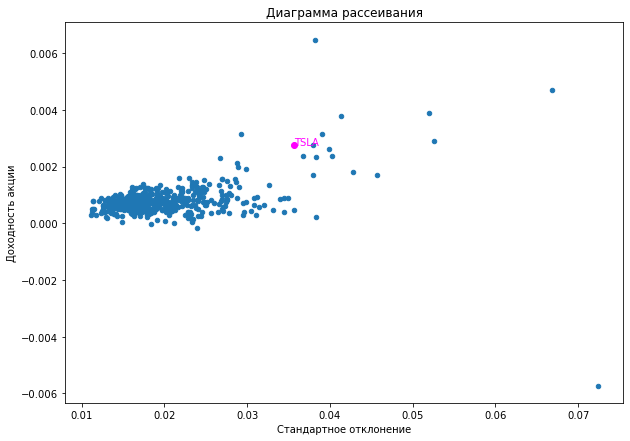

In [727]:
df_result.plot.scatter(x = 'std', y = 'r')
plt.scatter(x = df_result.loc['TSLA', 'std'], y = df_result.loc['TSLA', 'r'], color = 'fuchsia')
plt.annotate('TSLA', (df_result.loc['TSLA', 'std'], df_result.loc['TSLA','r']), color = 'fuchsia')
plt.xlabel('Стандартное отклонение')
plt.ylabel('Доходность акции')
plt.title('Диаграмма рассеивания');

Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ 

__ж) [5 баллов]__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают $\text{VaR}$. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $\text{VaR}$. Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль уровня $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ $\text{VaR}$ по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Запишите `VaR` в табличку `df_result` отдельной колонкой (нужно сделать `join`). Домножьте значения VaR на -1, чтобы интерпретировать числа как потери.  

In [728]:
VaR = pd.DataFrame({'VaR': df_train.quantile(0.05) * (-1)})

In [729]:
# добавим получившиеся значения в нашу таблицу
df_result = df_result.join(VaR)
df_result.head()

,std,r,VaR
A,0.015556,0.000808,0.025164
AAL,0.031476,0.000579,0.044087
AAP,0.020050,0.000659,0.026499
AAPL,0.017579,0.001268,0.025629
ABBV,0.017331,0.000925,0.024926


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага. Отдельно отметьте теслу. В качестве меры риска используйте $\text{VaR}.$

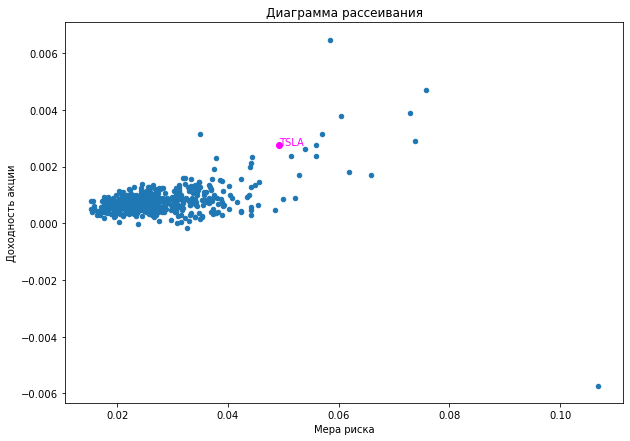

In [730]:
df_result.plot.scatter(x = 'VaR', y = 'r')
plt.scatter(x = df_result.loc['TSLA', 'VaR'], y = df_result.loc['TSLA', 'r'], color = 'fuchsia')
plt.annotate('TSLA', (df_result.loc['TSLA', 'VaR'], df_result.loc['TSLA','r' ]), color = 'fuchsia')
plt.xlabel('Мера риска')
plt.ylabel('Доходность акции')
plt.title('Диаграмма рассеивания');

$\text{VaR}$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $\text{VaR}$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$ худших случаев?…

__Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $\text{VaR}$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $\text{ES}$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Посчитайте, сколько денег мы заработаем в $5\%$ лучших случаев к концу дня? 

__Важно:__ $\text{VaR}$ и $\text{ES}$ в этом пункте - отрицательные числа.

In [732]:
VaR_TSLA = VaR.loc['TSLA', 'VaR'] * (-1)
ES_TSLA = df_train[df_train['TSLA'] < VaR_TSLA]['TSLA'].mean()
print('ES для Теслы =', ES_TSLA)
print('Средняя потеря в один из самых неудачных дней:', ES_TSLA*(-1000))

five_q = df_train.quantile(0.95)
five_lucky = df_train.loc[df_train['TSLA'] >= five_q['TSLA'], ['TSLA']].mean()
print('Заработок в 5% лучших случаев к концу дня:', *five_lucky*1000)

ES для Теслы = -0.07554044469806388
Средняя потеря в один из самых неудачных дней: 75.54044469806388
Заработок в 5% лучших случаев к концу дня: 93.9084648765163


Посчитайте $\text{ES}$ по всем ценным бумагам. Домножьте получившееся значение на (-1). Запишите его отдельным столбцом в `df_result` (нужно сделать `join`)

In [733]:
ES_total = pd.DataFrame({'ES' : df_train[df_train < df_result['VaR'] * (-1)].mean()})
df_result = df_result.join(ES_total * (-1))
df_result

,std,r,VaR,ES
A,0.015556,0.000808,0.025164,0.036676
AAL,0.031476,0.000579,0.044087,0.067565
AAP,0.020050,0.000659,0.026499,0.043459
AAPL,0.017579,0.001268,0.025629,0.039872
ABBV,0.017331,0.000925,0.024926,0.040371
...,...,...,...,...
ZBRA,0.023282,0.001256,0.030612,0.052334
ZION,0.020683,0.000733,0.030714,0.046021
ZM,0.042788,0.001823,0.061953,0.088902
ZS,0.037999,0.002762,0.055926,0.082118


In [734]:
df_result.reset_index(inplace= True )

In [735]:
df_result = df_result.rename(columns = {'index' : 'Ticker'})

In [736]:
var_result = df_result.round(3).sort_values(by = 'ES', ascending=False)

In [737]:
var_result

,Ticker,std,r,VaR,ES
405,RIVN,0.072,-0.006,0.107,0.138
275,LCID,0.067,0.005,0.076,0.125
162,ENPH,0.053,0.003,0.074,0.105
322,MRNA,0.052,0.004,0.073,0.104
370,PDD,0.046,0.002,0.066,0.092
...,...,...,...,...,...
413,RSG,0.011,0.001,0.016,0.026
500,WM,0.011,0.001,0.015,0.026
376,PG,0.011,0.000,0.015,0.026
373,PEP,0.011,0.001,0.016,0.025


In [237]:
var_result.to_csv('var_result.csv', index=False)

1. Округлите данные до 3-х знаков после запятой `df_result.round(3)`
2. Отсортируйте таблицу `df_result` по колонке `ES` по убыванию
3. Запишите получившиеся результаты в таблицу с колонками `'Ticker', 'std', 'r', 'VaR', 'ES'` в файл `var_result` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми. Порядок колонок должен быть именно таким.
4. Отправьте свой файл `var_result.csv` в контест (https://contest.yandex.ru/contest/47242/problems/A) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

Student ID: dap_econ_2022_120

link: https://official.contest.yandex.ru/contest/47242/run-report/84983341/

ID: 84983341

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__Какая метрика лучше?__

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. А к чему это приведет, можно прочитать в книге Скотта Паттерсона ["Кванты. Как волшебники от математики заработали миллиарды и чуть не обрушили фондовый рынок."](https://disk.yandex.ru/i/ryFfPZ8_1uTO6g) Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы.

## 1.3 VaR-кривая - не смог :( 

__з) [10 баллов]__ Мы что-то насчитали. А это вообще работает? Давайте проверим на тестовой выборке для Теслы.

In [738]:
var_tsla = df_train['TSLA'].quantile(0.05)
df_tsla = df_test['TSLA'].reset_index()
df_tsla['is_bad'] = (df_test['TSLA'].values < var_tsla)
df_tsla['is_bad'].mean()

0.14285714285714285

На тестовой выборке мы пробили для Теслы VaR в 14% случаев вместо 5%. Это очень плохой результат. Наша оценка риска оказалась провальной. Можно с помощью теста Купика проверить значимость этих отличий, но мы пока что не будем это делать. Отложим эту историю до домашки про гипотезы.

Нарисуем VaR-кривую.

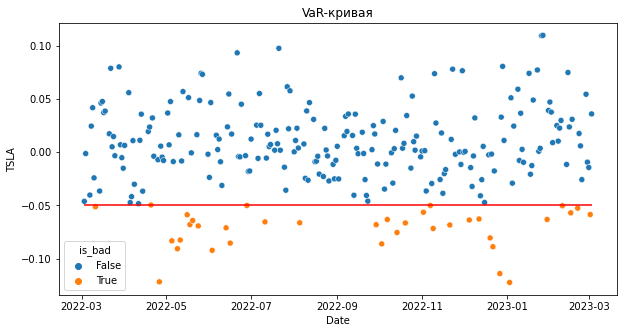

In [739]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red')
plt.title('VaR-кривая');

А почему все это плохо? А потому, что мы не расширяем обучающую выборку, то есть не учитываем новую информацию. Мы один раз предсказали $\text{VaR}$ и так с ним и сидим. Давайте сделаем по-другому.

- Выделите $N$ точек (первые 4 года), найдите по ним $\text{VaR}$ для $N+1$ дня. Потом сдвинем $N$ точек вправо и найдём $\text{VaR}$ по ним для точки $N + 2$. И так далее. Тогда $\text{VaR}$ будет в каждой точке разный. 
- Нарисуйте получившуюся для Теслы кривую на картинке.
- Посчитайте как часто мы пробивали $\text{VaR}$ на практике, улучшилась ли цифра?

In [ ]:
# your code here
# ʕ•ᴥ•ʔ

Способ оценки $\text{VaR},$ который мы использовали, называется **историческим.** Кроме него есть довольно много других способов. Например:

- можно попробовать подогнать какое-то распределение под данные и взять его квантиль
- можно попробовать обучить модель машинного обучения предсказывать соотвествующий квантиль
- можно обучить какую-нибудь модель на временном ряде
- можно попробовать отдельно моделировать хвосты распределения

Часть способов более подробно можно [посмотреть в лекциях Ильи Езепова.](https://rpubs.com/iezepov) Они немного староваты, но хороши. 

__и) [бонусные 5 баллов]__

Разберитесь как работает какой-нибудь ещё метод оценки $\text{VaR}$ и реализуйте его. Сравните его работу с историческим методом на нескольких ценных бумагах из наших данных. Например, вы можете разобраться с [ОГРом](https://rpubs.com/iezepov/e502lec2) или [моделированием хвостов.](https://rpubs.com/iezepov/e502lec6) Весь код должен быть написан на питоне. Часть бонуса -- попытаться найти библиотеки для этого.

In [ ]:
# your code here
# [✖‿✖]

  ---------

# Часть 2: чековая

За задание можно получить $50$ баллов. Мы будем работать с покупками и чеками. Смотреть за корреляциями в покупках довольно полезно.

> В 1992 году группа по консалтингу в области ритейла компании Teradata под руководством Томаса Блишока провела исследование 1.2 миллиона транзакций в 25 магазинах для ритейлера Osco Drug (Drug Store — формат разнокалиберных магазинов у дома). После анализа всех этих транзакций самым сильным правилом получилось «Между 17:00 и 19:00 чаще всего пиво и подгузники покупают вместе». 

>К сожалению, такое правило показалось руководству Osco Drug настолько контринтуитивным, что ставить подгузники на полках рядом с пивом они не стали. Хотя объяснение паре пиво-подгузники вполне себе нашлось: когда оба члена молодой семьи возвращались с работы домой (как раз часам к 5 вечера), жены обычно отправляли мужей за подгузниками в ближайший магазин. И мужья, не долго думая, совмещали приятное с полезным — покупали подгузники по заданию жены и пиво для собственного вечернего времяпрепровождения.

Для работы будем использовать датасет о продуктовых корзинах: https://www.kaggle.com/heeraldedhia/groceries-dataset

- `id` - номер покупки (чека)
- `fielddate` - дата покупки
- `product` - что было куплено

In [740]:
df = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/data/groceries.csv', sep=',')
df.columns = ['id', 'fielddate', 'product']
print(df.shape)
df

(38765, 3)


,id,fielddate,product
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


## 2.1 Разогреваемся

__а) [10 баллов]__ Сколько всего уникальных заказов было сделано?

In [741]:
print('Количество уникальных заказов:', df.nunique()[0])

Количество уникальных заказов: 3898


Какие товары покупались чаще всего? Найдите топ-10 самых популярных товаров и изобразите частоту их покупок на столбиковой диаграмме. 

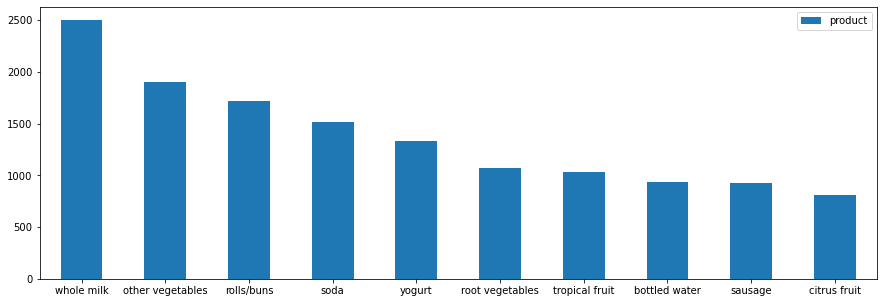

In [742]:
popular = pd.DataFrame(df['product'].value_counts()[:10]) 
ax = popular.plot.bar(rot=0, figsize=(15,5))

## 

Визуализируйте как часто покупались товары с помощью [облака слов.](https://www.python-graph-gallery.com/wordcloud/) Для графика используйте все товары из датасета. 

In [364]:
!pip install wordcloud

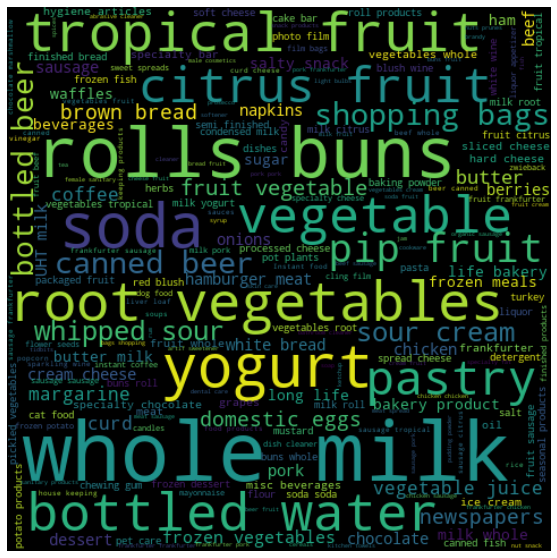

In [744]:
from wordcloud import WordCloud
text = ' '.join(df['product'])
wordcloud = WordCloud(width = 480, height = 480, margin = 0).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()
plt.rcParams['figure.figsize'] = (20, 10);

__б) [10 баллов]__ Начнём анализировать совместные покупки товаров.

В таблице выше в каждой строке записана информация о покупке конкретного товара. Давайте сделаем табличку размера "число товаров" на "число покупок", чтобы понимать какие товары покупались вместе, а какие нет. 

По строкам отложите номера чеков. По столбцам отложите название продуктов. На пересечении должно стоять число товаров, купленное в этом чеке. Используйте для этого команду `pivot_table`.

In [745]:
df_pivot = df.pivot_table(index='id', columns='product', values='id', aggfunc='count', fill_value=0)
df_pivot

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


В нашей матрице огромное число нулей. Обычно такие матрицы называют разряжеными. Мы занимаем нулями кучу свободной памяти, которую мы могли бы не занимать, если бы хранили данные [в виде разреженных матриц.](https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/) У нас данные небольшие, поэтому мы забьём на неоптимальность и продолжим работать с ними в `pandas`.

Постройте матрицу корреляций Пирсона. Визуализируйте матрицу с помошью heatmap.

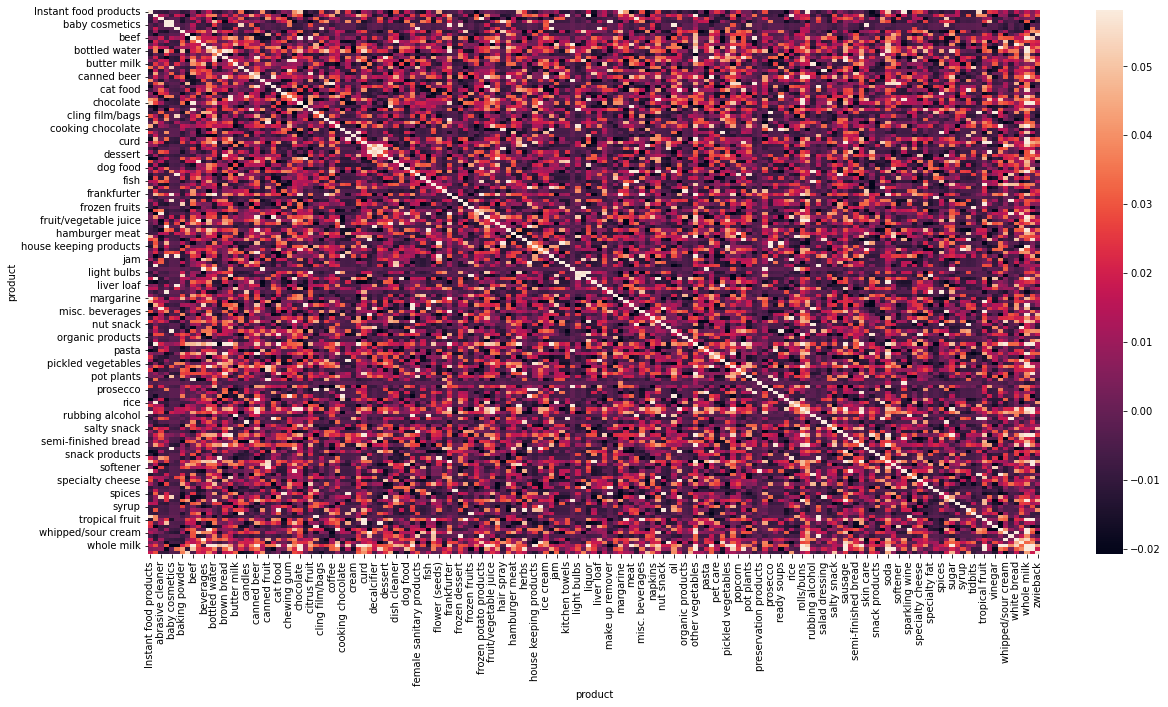

In [746]:
prs = df_pivot.corr(method='pearson')
sns.heatmap(prs, robust = True) # ковер красивый получился, у меня на даче такой висит на стене
plt.rcParams['figure.figsize'] = (20, 10);

Какие продукты сильнее всего коррелируют с яйцами, `domestic eggs` (их чаще всего покупают вместе)? Какие продукты "мешают" купить яйца, то есть отрицательно коррелируют с их покупкой? 

In [747]:
prs_corr = prs - np.eye(167)
print('Сильнее всего коррелируют с яйцами:', ', '.join(prs_corr['domestic eggs'].sort_values().tail().index.to_list()))
print('Слабее всего коррелируют с яйцами:', ', '.join(prs_corr['domestic eggs'].sort_values().head().index.to_list()))

Сильнее всего коррелируют с яйцами: meat, rubbing alcohol, newspapers, whole milk, meat spreads
Слабее всего коррелируют с яйцами: pet care, cooking chocolate, ready soups, dessert, cream


Какие два продукта коррелируют сильнее всего? 

In [748]:
print('Сильнее всего коррелируют:' , ' и '.join(prs_corr.max().sort_values()[-2:].index.to_list()))

Сильнее всего коррелируют: preservation products и soups


__Вопрос:__ почему корреляция пирсона это плохой способ измерить взаимосвязть между покупками?

__Ответ:__ корреляция пирсона измеряет только линейную взаимосвзяь между покупками, поэтому может не учитывать нелинейные зависимости: сезон, мода, события в мире.  


## 2.2 Коэффициент корреляции Мэтьюса

__Коэффициент корреляции Мэтьюса__ — это мера силы взаимосвязи между двумя бинарными переменными. Для того чтобы его вычислить, необходимо использовать таблицу сопряженности

|        |  $0$   |  $1$   |
|:------:|:------:|:------:|
| $0$    |  $a$   |  $b$   |
| $1$    |  $c$   |  $d$   |

В строках таблицы сопряжённости находятся значения одного признака, по столбцам — второго, в каждой ячейке — количество объектов, на которых реализовалась эта пара. Коэффициент корреляции Мэтьюса вычисляется по данным из таблицы сопряжённости следующим образом:

$$
MCC(X_1, X_2) = \frac{a \cdot d - b \cdot c}{\sqrt{(a + b) \cdot (a + c) \cdot (b + d) \cdot (c + d)}}
$$

Точно так же, как и коэффициенты Пирсона и Спирмена, корреляция Мэтьюса лежит в диапазоне от $−1$ до $1.$ Нулевое значение соответсвуте отсутствию взаимосвязи между переменными. Значение $MCC(X_1, X_2) = 1$ соотвествует случаю, когда $X_1$ и $X_2$ полностью совпадают, то есть $b = c = 0$. Значение  $MCC(X_1, X_2) = -1$ соответствует случаю, когда каждое значение $X_1$ отличается от каждого значения $X_2$. 

Для категориальных переменных можно также считать коэффициент V-Крамера. Подробнее можно почитать про разные корреляции [в этом конспекте.](https://disk.yandex.ru/i/Znahvyg3mIrW9A)

__в) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары коэффициент корреляции Мэтьюса. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, matthews_corrcoef`. 
5. Отсортируйте получившиеся пары по коэффициенту Мэтьюса от 1 к -1 и сохраните первые сто строк получившейся таблички в файл `result_matthews.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [749]:
from sklearn.metrics import matthews_corrcoef
from itertools import combinations
MCC = df_pivot.astype('int32')
MCC[MCC > 1] = 1 #если товар есть в чеке, то оставляем 1
ass = MCC.sum()[df_pivot.sum() < 10].index
MCC.drop(columns = ass, inplace = True)
couple = pd.DataFrame(combinations(MCC, 2))
couple.columns = ['product_1', 'product_2']

arr = pd.DataFrame(columns = ['matthews_corrcoef'])
c = 0 
for i, j in couple.values.tolist():
    mat_corr = matthews_corrcoef(MCC[i], MCC[j])
    arr.at[c, 'matthews_corrcoef'] = mat_corr
    c+=1

couple = couple.join(arr)
result_mat = couple.sort_values(by = 'matthews_corrcoef', ascending=False)
result_mat.head()


,product_1,product_2,matthews_corrcoef
9689,nut snack,tea,0.117578
6542,flower (seeds),honey,0.095058
11218,sausage,yogurt,0.09404
7958,honey,ketchup,0.093365
11778,whole milk,yogurt,0.093302


In [664]:
result_mat.head(100).to_csv('result_mat.csv', index=False)

Student ID: dap_econ_2022_120

link: https://official.contest.yandex.ru/contest/47242/run-report/85018476/

ID: 85018476


Отправьте свой файл `result_mat.csv` в контест (https://contest.yandex.ru/contest/47242/problems/B/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

## 2.3 Независимость событий

 Конечно же, корреляция — это [не единственный способ искать](https://habr.com/ru/company/ods/blog/353502/) между покупками ассоциативные правила. Давайе попробуем другой подход.

Мы знаем, что события $A$ и $B$ называются независимыми, если $P(AB) = P(A)\cdot P(B)$. Отталкиваясь от этого определения, можно ввести другую характеристику, которая показывает, насколько продукты зависят друг от друга, а именно __поддержку (lift).__ 

$$
lift = \frac{P(AB)}{P(A)\cdot P(B)}
$$

Эта метрика описывает отношение зависимости товаров к их независимости. Если оказалось, что `lift = 1`, это означает, что покупка товара $A$ не зависит от покупки товара $B$. Если `lift > 1`, то это означает, что вероятность встретить оба товара в чеке, $P(AB)$ высокая, то есть товары покупают вместе. Если `lift < 1`, это означает, что товары, наоборот, очень часто покупают по-отдельности. 

__г) [5 баллов]__ Посчитайте значение нашей метрики для яиц и молока (`'whole milk', 'domestic eggs'`).

> Вам аккуратно нужно сделать три среза по условию  `>= 1`. Там, где пара надо делать срез так, чтобы оба товара дали `True`. Сделать это в одну строку вам поможет метод `.all(axis=1)`. Частоты можно получить методом `.mean()`, так как python думает, что `False` - это ноль, а `True` - это единица.

In [750]:
p_milk = (df_pivot['whole milk'] >= 1).sum()/ len(df_pivot)
p_eggs = (df_pivot['domestic eggs'] >= 1).sum()/ len(df_pivot)
p_milk_eggs = df_pivot[['whole milk', 'domestic eggs']].all(axis = 1).sum()/ len(df_pivot)
lift_g = p_milk_eggs / (p_milk*p_eggs)
print('Значение метрики для молока и яиц:', lift_g)

Значение метрики для молока и яиц: 1.152241691425711


__д) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары значение поддержки, `lift`. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, lift`. 
5. Отсортируйте получившиеся пары по значению lift от больших к меньшим и сохраните первые сто строк получившейся таблички в файл `result_lift.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [751]:
lift = df_pivot.astype('int32')
lift[lift > 1] = 1 #если товар есть в чеке, то оставляем 1
doors = lift.sum()[df_pivot.sum() < 10].index
lift.drop(columns = doors, inplace = True)
couple_lift = pd.DataFrame(combinations(lift, 2))
couple_lift.columns = ['product_1', 'product_2']

floor = pd.DataFrame(columns = ['lift'])
d = 0 
for i, j in couple_lift.values.tolist():
    lift_corr = (lift[[i, j]].all(axis = 1).sum()/ len(lift)) / (((lift[i] >= 1).sum()/ len(lift)) * ((lift[j] >= 1).sum()/ len(lift)))
    floor.at[d, 'lift'] = lift_corr
    d+=1

couple_lift = couple_lift.join(floor)
result_lift = couple_lift.sort_values(by = 'lift', ascending=False)
result_lift.head()


,product_1,product_2,lift
6669,flower soil/fertilizer,organic products,24.3625
7995,honey,ready soups,19.989744
9689,nut snack,tea,19.686869
7958,honey,ketchup,18.740385
4715,cooking chocolate,ready soups,17.324444


In [690]:
result_lift.head(100).to_csv('result_lift.csv', index=False)

Sudent ID: dap_econ_2022_120

link: https://official.contest.yandex.ru/contest/47242/run-report/85026967/

ID: 85026967

Отправьте свой файл `result_lift.csv` в контест (https://contest.yandex.ru/contest/47242/problems/C/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__е) [5 баллов]__ Давайте проинтепретируем результаты.

- Посмотрите на 10 пар продуктов с самой высокой корреляцией Мэтьюса и на 10 пар с самой низкой. Проинтерпретируйте, насколько эта корреляция логична? Придумайте ситуации, когда какие-то из пар могли бы покупаться вместе.
- Посмотрите на 10 пар продкутов с самым высоким lift, насколько логично они выделились? 
- Насколько большим оказалось пересечение двух методов? Как думаете, почему? А если взять первые сто пар?

__Ответы:__  ниже

In [752]:
result_mat[:10]

,product_1,product_2,matthews_corrcoef
9689,nut snack,tea,0.117578
6542,flower (seeds),honey,0.095058
11218,sausage,yogurt,0.09404
7958,honey,ketchup,0.093365
11778,whole milk,yogurt,0.093302
8582,kitchen towels,rum,0.089588
8417,jam,rice,0.08847
2954,canned fruit,potato products,0.08802
3254,cat food,tea,0.087834
6354,fish,meat spreads,0.086703


Ну что сказать, как будто бы все логично и товары с высокой корреляцией могут быть куплены вместе. Выделяются, конечно, такие приколы, как: мед и кетчуп, кухонные полотенца и ром, кошачий корм и чай. Но а почему бы и нет:)

In [696]:
result_mat[-10:]

,product_1,product_2,matthews_corrcoef
10431,pip fruit,soups,-0.032088
8725,liquor,pip fruit,-0.032196
10845,red/blush wine,semi-finished bread,-0.032391
8138,hygiene articles,mayonnaise,-0.032691
9227,meat,mustard,-0.03334
10259,pet care,salty snack,-0.033813
8570,kitchen towels,pork,-0.0344
1141,berries,photo/film,-0.034996
8962,long life bakery product,red/blush wine,-0.03791
7921,herbs,shopping bags,-0.052079


Ну а здесь довольно-таки логично, что не особо сочетаемые товары имеют низкую корреляцию. Хотя как будто бы отважные девушки могут использовать гигиеничские принадлежности и майонез, для того чтобы сделать масочку на лицо и поразить всех самцов на паре, но это не факт. А вот мясо и горчица вроде как очень даже могут сочетаться.

In [697]:
result_lift[:10]

,product_1,product_2,lift
6669,flower soil/fertilizer,organic products,24.3625
7995,honey,ready soups,19.989744
9689,nut snack,tea,19.686869
7958,honey,ketchup,18.740385
4715,cooking chocolate,ready soups,17.324444
2954,canned fruit,potato products,16.874459
7114,frozen fruits,tidbits,16.107438
7993,honey,prosecco,15.781377
8009,honey,skin care,14.992308
4713,cooking chocolate,prosecco,13.677193


Что-то похожее на табличку корреляции Мэтьюсона, и продукты, которые +- сочетаются имеют высокую связь. Я бы вот обязательно взял к готовому супу приготовленный шоколад в качестве десерта. А вот во время болезни можно в принципе использовать настоечку: мед запивать горячей просекой и все будет хорошо: горло не болит, настроение хорошее.

In [753]:
result_mat[:10].isin(result_lift[:10]).sum()

product_1            3
product_2            3
matthews_corrcoef    0
dtype: int64

In [754]:
result_mat[:100].isin(result_lift[:100]).sum()

product_1            34
product_2            34
matthews_corrcoef     0
dtype: int64

В обоих случаях примерно треть совпадений, это, конечно, не много. Означает, что методы работают не по одному алгоритму. Кому верить? Не понятно. Я вот верю в то, что Элвис Пресли умер. Грустно, согласен...

__ё) [бонусные 5 баллов]__ 

Иногда в чеках пытаются искать __продукты-якоря.__ То есть продукты, которые являются основными. Например: айфон - основной продукт, наушники и чехол - дополнения к нему. Предложите алгоритм поиска таких товаров, похожий на то, что мы делали выше. Реализуйте алгоритм поиска якорей, который вы придумали. 

__Ответ:__ ваш текст


In [ ]:
# your code here
# [̲̅$̲̅(̲̅5̲̅)̲̅$̲̅]